# Exploration of Track Data Retrieved From Spotify API

In [23]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

## Create DataFrame From .csv File From spotipy_data_retrieval.py Script

In [24]:
# Load DataFrame from .csv generated by spotipy_data_retrieval.py:
with open('/Users/timothymiller/Galvanize/Capstone_1/Music-Genre-Analysis-Using-Spotify-API/\
data/master_tracks_genres_2019-09-10_215018.csv', 'r') as f:
        df_master = pd.read_csv(f)

In [25]:
df_master.shape

(54680, 26)

In [26]:
# Check column names:
df_master.columns

Index(['id', 'popularity', 'track_name', 'duration_ms_x', 'album_name',
       'album_id', 'artist_name', 'artist_id', 'acousticness', 'analysis_url',
       'danceability', 'duration_ms_y', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'type', 'uri', 'valence', 'genres'],
      dtype='object')

In [27]:
# Re-order columns within DataFrame for ease of use:
df_master = df_master[['track_name', 'artist_name', 'album_name', 'popularity',
                       'duration_ms_x', 'genres', 'id', 'album_id', 'artist_id',
                       'acousticness', 'danceability', 'energy', 'instrumentalness',
                       'liveness', 'loudness', 'speechiness', 'valence',
                       'analysis_url', 'duration_ms_y', 'key', 'mode', 'tempo',
                       'time_signature', 'track_href', 'type', 'uri']]

## Parse Track Genre Information

In [28]:
# Split all genre strings:
genre_long_list = []
genre_names = df_master['genres']
for genre in genre_names:
    if type(genre) is str:
        if len(genre) > 0:
            genre_long_list.append(genre)
        
genre_long_list_1 = ", ".join(genre_long_list)
genre_long_list_2 = genre_long_list_1.split(", ")
print(genre_long_list_2[:100])

['dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'dance pop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'atl hip hop', 'atl trap', 'gangster rap', 'pop', 'pop rap', 'rap', 'trap music', 'atl hip hop', 'atl trap', 'gangster rap', 'pop', 'pop rap', 'rap', 'trap music', 'atl hip hop', 'atl trap', 'gangster rap', 'pop', 'pop rap', 'rap', 'trap music', 'atl hip hop', 'atl trap', 'gangster rap', 'pop', 'pop rap', 'rap', 'trap music', 'atl hip hop', 'a

In [29]:
# Count unique genre strings:
c = Counter(genre_long_list_2)
print(len(list(c)))
print(list(c)[:40])

1499
['dance pop', 'pop', 'electropop', 'atl hip hop', 'atl trap', 'gangster rap', 'pop rap', 'rap', 'trap music', 'country rap', 'escape room', 'minnesota hip hop', 'trap queen', 'nc hip hop', 'post-teen pop', 'uk pop', 'chicago rap', 'conscious hip hop', 'hip hop', 'r&b', 'dfw rap', 'canadian hip hop', 'canadian pop', 'toronto rap', 'cali rap', 'southern hip hop', 'viral pop', 'boy band', 'latin', 'reggaeton', 'edm', 'tropical house', 'dmv rap', 'underground hip hop', 'vapor trap', 'alternative metal', 'art rock', 'nu metal', 'post-grunge', 'post-metal']


In [30]:
# Split genre strings into individual words:
genre_long_words_list = []
genre_names = df_master['genres']
for genre in genre_names:
    if type(genre) is str:
        if len(genre) > 0:
            genre_long_words_list.append(genre)
        
genre_long_words_list_1 = ", ".join(genre_long_words_list)
genre_long_words_list_2 = genre_long_words_list_1.replace(",", "")
genre_long_words_list_3 = genre_long_words_list_2.split(" ")
print(genre_long_words_list_3[:100])

['dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'dance', 'pop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'electropop', 'pop', 'atl', 'hip', 'hop', 'atl', 'trap', 'gangster', 'rap', 'pop', 'pop', 'rap', 'rap', 'trap', 'music', 'atl', 'hip', 'hop', 'atl', 'trap']


## Choose 12 Genre Categories for Further Analysis

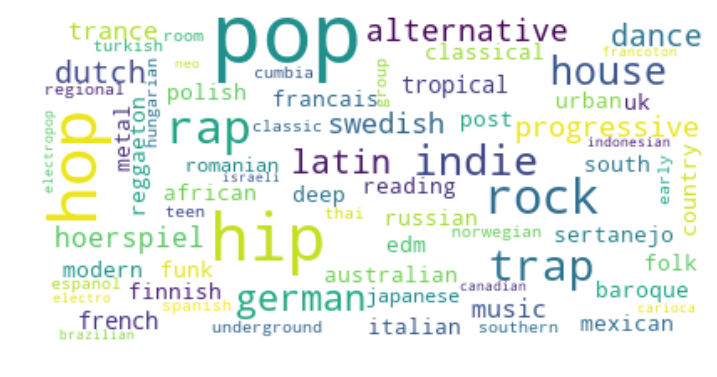

In [31]:
# Create WordCloud of words in genres:
wordcloud = WordCloud(max_font_size=50,
                         max_words=70,
                         collocations=False,
                         background_color="white",
                     ).generate(genre_long_words_list_1)
fig, ax = plt.subplots(figsize=(12,18))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

In [32]:
# Count unique words in genres and print most common:
c = Counter(genre_long_words_list_3)
print(len(list(c)))
print(c.most_common(40))

922
[('pop', 23666), ('hip', 14475), ('hop', 14415), ('rock', 6800), ('rap', 6387), ('trap', 5488), ('indie', 4760), ('house', 4077), ('german', 3758), ('latin', 3178), ('dutch', 2683), ('alternative', 2535), ('dance', 2439), ('swedish', 2287), ('progressive', 2245), ('hoerspiel', 2068), ('r&b', 2024), ('trance', 1887), ('music', 1852), ('tropical', 1702), ('french', 1642), ('francais', 1454), ('deep', 1377), ('classical', 1373), ('modern', 1354), ('edm', 1319), ('italian', 1309), ('urban', 1284), ('australian', 1223), ('sertanejo', 1192), ('polish', 1155), ('j-pop', 1121), ('mexican', 1102), ('country', 1092), ('metal', 1070), ('baroque', 1067), ('south', 1058), ('k-pop', 1040), ('funk', 1038), ('african', 985)]


In [33]:
# 12 somewhat subjectively chosen genre categories for further analysis:
genre_split_list = ['pop','hip','rock','rap','trap','indie','house','latin',\
                    'alternative','r&b','trance','edm']

## Popularity Data Analysis

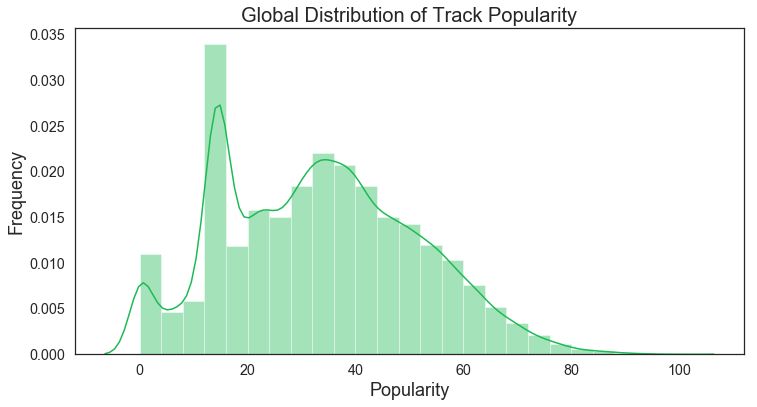

In [34]:
# Plot overall distribution of track popularity scores:
sns.set(font_scale=1.3)
sns.set_style("white")
ax1 = plt.subplots(figsize=(12, 6))
ax1 = sns.distplot(df_master['popularity'], bins=25, color='#1DB954')
ax1.set_xlabel('Popularity',fontsize=18)
ax1.set_ylabel('Frequency',fontsize=18)

ax1.set_title("Global Distribution of Track Popularity",\
             fontsize=20);

In [35]:
# Find score value for 80% popularity cutoff:
popularity_cutoff = df_master['popularity'].quantile(q=0.8)
print(popularity_cutoff)

50.0


In [36]:
# Add binary column to DataFrame showing whether track is in top 20% of popularity:
df_master['is_popular'] = np.where(df_master['popularity']>=popularity_cutoff, 1, 0)

In [37]:
# Drop NaN rows, lose approx. 20% of data.
df_drop_genres = df_master.dropna()

In [38]:
# Show most popular song in data set:
df_drop_genres.sort_values('popularity', ascending=False).head(1)

,track_name,artist_name,album_name,popularity,duration_ms_x,genres,id,album_id,artist_id,acousticness,...,analysis_url,duration_ms_y,key,mode,tempo,time_signature,track_href,type,uri,is_popular
301,Señorita,Shawn Mendes,Señorita,100,190960,"canadian pop, pop, viral pop",0TK2YIli7K1leLovkQiNik,2ZaX1FdZCwchXl1QZiD4O4,7n2wHs1TKAczGzO7Dd2rGr,0.037,...,https://api.spotify.com/v1/audio-analysis/0TK2...,190960,9,0,116.947,4,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,audio_features,spotify:track:0TK2YIli7K1leLovkQiNik,1


## Popularity Analysis By Genre

In [44]:
# Create separate DataFrames for each genre for future analysis:
for genre in genre_split_list:
    genre = df_drop_genres[df_drop_genres['genres'].str.contains(genre)]

In [45]:
df_pop = df_drop_genres[df_drop_genres['genres'].str.contains('pop')]

In [46]:
df_trance = df_drop_genres[df_drop_genres['genres'].str.contains('trance')]

In [47]:
df_trap = df_drop_genres[df_drop_genres['genres'].str.contains('trap')]

In [48]:
genre_track_counts_total = [len(df_drop_genres[df_drop_genres['genres'].str.contains(genre)]) for \
                                 genre in genre_split_list]
print(genre_track_counts_total)

[18570, 12226, 4554, 7893, 5046, 3973, 2743, 1864, 2472, 1504, 957, 1179]


In [49]:
genre_track_counts_popular = [len(df_drop_genres[(df_drop_genres['genres'].str.contains(genre)) & \
                                   (df_drop_genres['is_popular'] == 1)]) for \
                                 genre in genre_split_list]
print(genre_track_counts_popular)

[5652, 3908, 860, 3190, 2143, 1029, 600, 702, 677, 554, 20, 422]


In [50]:
genre_track_counts_unpopular = [len(df_drop_genres[(df_drop_genres['genres'].str.contains(genre)) & \
                                   (df_drop_genres['is_popular'] == 0)]) for \
                                 genre in genre_split_list]
print(genre_track_counts_unpopular)

[12918, 8318, 3694, 4703, 2903, 2944, 2143, 1162, 1795, 950, 937, 757]


In [51]:
gen_argsort = np.argsort(genre_track_counts_total)[::-1]

In [52]:
genre_track_counts_total_sort = [genre_track_counts_total[idx] for idx in gen_argsort]
print(genre_track_counts_total_sort)

[18570, 12226, 7893, 5046, 4554, 3973, 2743, 2472, 1864, 1504, 1179, 957]


In [53]:
genre_track_counts_unpopular_sort = [genre_track_counts_unpopular[idx] for idx in gen_argsort]
print(genre_track_counts_unpopular_sort)

[12918, 8318, 4703, 2903, 3694, 2944, 2143, 1795, 1162, 950, 757, 937]


In [54]:
genre_track_counts_popular_sort = [genre_track_counts_popular[idx] for idx in gen_argsort]
print(genre_track_counts_popular_sort)

[5652, 3908, 3190, 2143, 860, 1029, 600, 677, 702, 554, 422, 20]


In [55]:
genre_split_list_sort = [genre_split_list[idx] for idx in gen_argsort]
print(genre_split_list_sort)

['pop', 'hip', 'rap', 'trap', 'rock', 'indie', 'house', 'alternative', 'latin', 'r&b', 'edm', 'trance']


In [56]:
genre_labels_pretty = ['Pop', 'Hip-Hop', 'Rap', 'Trap', 'Rock', 'Indie', 'House', 'Alternative', 'Latin', 'R&B', 'EDM', 'Trance']

In [57]:
popularity_ratios = [x/y*100 for x, y in zip(genre_track_counts_popular_sort, genre_track_counts_total_sort)]

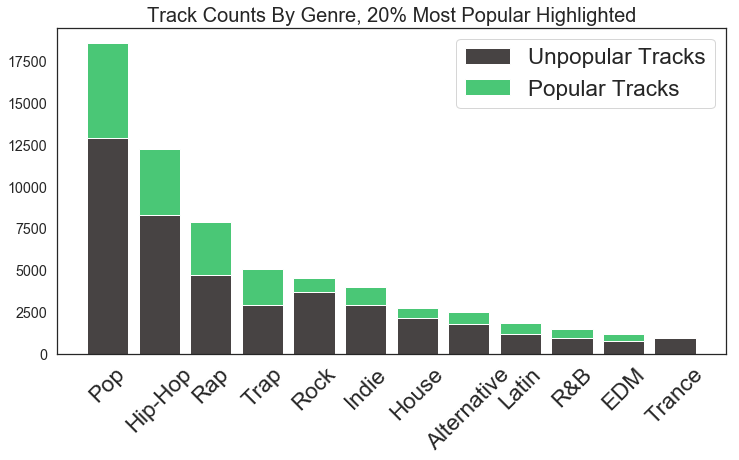

In [61]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)

x_values = genre_labels_pretty
ax1.bar(x_values, genre_track_counts_unpopular_sort, color='#191414CC', edgecolor='#FFFFFF',
            label="Unpopular Tracks")
ax1.bar(x_values, genre_track_counts_popular_sort, bottom=genre_track_counts_unpopular_sort, \
             color='#1DB954CC', edgecolor='#FFFFFF', label="Popular Tracks")
plt.xticks(rotation=45, fontsize = 'x-large')
ax1.legend(fontsize = 'x-large')
ax1.set_title("Track Counts By Genre, 20% Most Popular Highlighted",\
             fontsize=20)
plt.show();

In [62]:
popularity_ratios = [x/y*100 for x, y in zip(genre_track_counts_popular_sort, genre_track_counts_total_sort)]
popularity_ratios_format = ["%.2f" % num for num in popularity_ratios]
print(popularity_ratios)
print(popularity_ratios_format)

[30.436187399030697, 31.964665467037463, 40.41555808944635, 42.469282600079275, 18.884497145366712, 25.899823810722378, 21.873860736419978, 27.386731391585762, 37.66094420600859, 36.83510638297872, 35.7930449533503, 2.089864158829676]
['30.44', '31.96', '40.42', '42.47', '18.88', '25.90', '21.87', '27.39', '37.66', '36.84', '35.79', '2.09']


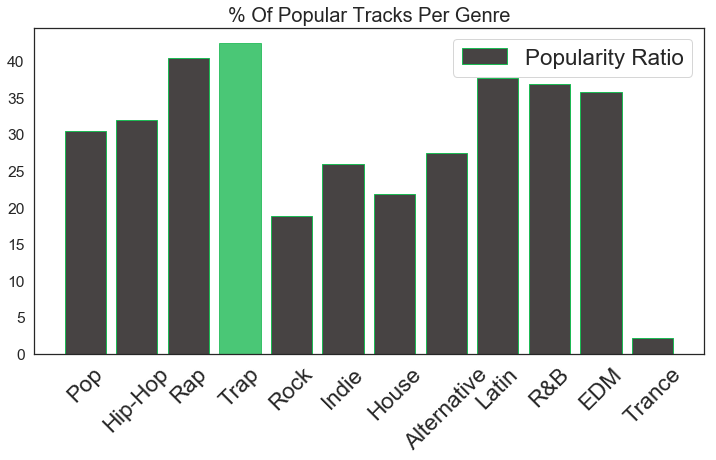

In [63]:
x_values = genre_labels_pretty
ax = plt.subplots(figsize=(12, 6))
ax = plt.bar(x_values, popularity_ratios, color='#191414CC', edgecolor='#1DB954',
            label="Popularity Ratio")
ax[3].set_color('#1DB954CC')
plt.xticks(rotation=45, fontsize = 'x-large')
plt.yticks(fontsize = 'medium')
plt.legend(fontsize = 'x-large')

plt.title("% Of Popular Tracks Per Genre", fontsize=20)

plt.show()

## Finding Outliers

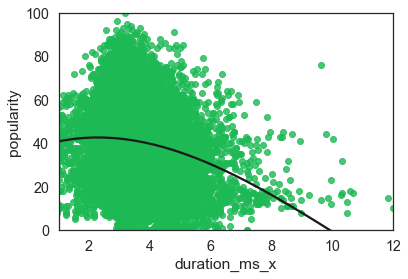

In [64]:
ax = sns.regplot(df_pop['duration_ms_x']/60000, df_pop['popularity'], color='#1DB954', ci=None, order=3, 
                 line_kws={'color':'k'})
ax.set(xlim=(1, 12), ylim=(0, 100));

In [65]:
pop_outlier = df_pop.loc[(df_pop['duration_ms_x']/60000 > 8) \
                         & (df_pop['popularity'] > 60)]

print(f"Artist: {pop_outlier['artist_name']} Track: {pop_outlier['track_name']}")

Artist: 341    Lana Del Rey
Name: artist_name, dtype: object Track: 341    Venice Bitch
Name: track_name, dtype: object


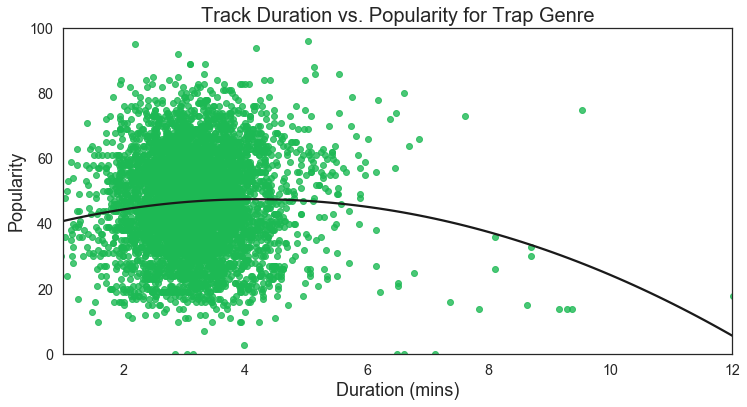

In [66]:
sns.set(font_scale=1.3)
sns.set_style("white")
ax = plt.subplots(figsize=(12, 6))
ax = sns.regplot(df_trap['duration_ms_x']/60000, df_trap['popularity'],
                 color='#1DB95455', ci=None, order=2, line_kws={'color':'k'})
ax.set_xlabel('Duration (mins)',fontsize=18)
ax.set_ylabel('Popularity',fontsize=18)
ax.set(xlim=(1, 12), ylim=(0, 100))
ax.set_title("Track Duration vs. Popularity for Trap Genre",
             fontsize=20);


In [67]:
trap_outlier = df_trap.loc[(df_trap['duration_ms_x']/60000 > 8) \
                         & (df_trap['popularity'] > 60)]

print(f"Long, Popular Trap Outlier:\n  Artist: {trap_outlier['artist_name'].iloc[0]}\n\
  Track: {trap_outlier['track_name'].iloc[0]}")

Long, Popular Trap Outlier:
  Artist: Pineapple StormTv
  Track: Poesia Acústica #7: Céu Azul


In [ ]:
trap_outlier_short = df_trap.loc[(df_trap['duration_ms_x']/60000 < 2.2) \
                         & (df_trap['popularity'] > 90)]
print(f"Short, Popular Trap Outlier:\n  Artist: {trap_outlier_short['artist_name'].iloc[0]}\n\
  Track: {trap_outlier_short['track_name'].iloc[0]}")

In [ ]:
#trap_outlier_short
#https://p.scdn.co/mp3-preview/f168e21bd3e462fb086e8c2cb6064249d4c8e966?cid=3bb746dbeccf420f9210e16d14c951f3

## Audio Features Analysis Within Trap Music Genre

In [ ]:
df_trap_audio_features = df_trap[['id', 'popularity', 'duration_ms_x', 'acousticness',
                            'danceability', 'energy', 'instrumentalness', 'liveness',
                            'loudness', 'speechiness', 'tempo', 'valence']].copy()
df_trap_audio_features.head()

In [ ]:
# Credit: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="white")

# Compute the correlation matrix
corr = df_trap_audio_features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

labels = ['Popularity', 'Duration', 'Acousticness', 'Danceability', 'Energy',
          'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))
ax.tick_params(labelsize=16)
ax.set_title("Pairwise Correlations Between Trap Genre\nTrack Popularity And Audio Features",\
             fontsize=20)


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, s=85, l=35, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, xticklabels=labels, yticklabels=labels, mask=mask, cmap=cmap, 
            vmax=.28, center=0, square=True, linewidths=1, cbar_kws={"shrink": .5});

## Find Most Danceable Trap Music Song

In [ ]:
df_trap_sorted_dance = df_trap.sort_values('danceability', ascending=False)

print(f"Most Danceable Trap Song:\n  Artist: {df_trap_sorted_dance['artist_name'].iloc[0]}\n\
  Track: {df_trap_sorted_dance['track_name'].iloc[0]}")